# Ford GoBike Data
## by Nanda P
> This document explores a dataset containing bike rent time, member age, member gender, and station location.The data was recorded from june 2017 until Dec 2018

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
%matplotlib inline

## Preliminary Wrangling

In [ ]:
# Downloading the data from the website
folder_name = 'ford_go_bike'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
URL_PATTERN = 'https://s3.amazonaws.com/fordgobike-data/{}-fordgobike-tripdata.csv.zip'
url=[]
for i in range(201801,201813):
    flight_url = URL_PATTERN.format(i)
    url.append(flight_url)
    
folder_name = 'ford_go_bike'
if not os.path.exists(folder_name):
    os.makedir(folder_name)
    
for url in url:
    response = requests.get(url)
    with open (os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [2]:
# Reading the data, concatenate it into 1 dataframe, and remove some column
path = r'E:\04-DS_ML_PY\13 - Online Course\Udacity_DataAnalyst\05 - Data Visualization\Project\ford_go_bike'
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.concat([pd.read_csv(f)for f in allFiles],ignore_index=True,sort=True);
df=df.drop(['Station','Station ID','# of Docks','Latitude','Longitude','Municipality','end_station_latitude','end_station_longitude','start_station_latitude','start_station_longitude'],axis=1)

In [3]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_name,start_time,user_type
0,96.0,NaN,80110.0,43.0,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88.0,NaN,78800.0,96.0,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094.0,NaN,45768.0,245.0,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831.0,NaN,62172.0,5.0,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167.0,NaN,43603.0,247.0,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


### Data type issue
1. end_time must be converted from object to datetime
2. member_birth_year must be converted from float to integer
3. member_gender must be converted from object to category
4. start_time must be converted from object to datetime
5. user_type must be converted from object to category
6. bike_share_for_all_trip must be converted from object to category

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383614 entries, 0 to 2383613
Data columns (total 12 columns):
bike_id                    float64
bike_share_for_all_trip    object
duration_sec               float64
end_station_id             float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(5), object(7)
memory usage: 218.2+ MB


In [5]:
# Converting data type
df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)
df.member_gender=df.member_gender.astype('category')
df.user_type=df.user_type.astype('category')
df.bike_share_for_all_trip=df.bike_share_for_all_trip.astype('category')


### What is the structure of your dataset?

> There are 2383614 bike recording data from june 2017 until dec 2018. The data contain start-end rent time, member gender and age, and station location. It also has bike share for all data, the service for selected people who was qualify for Calfresh or SMFTA's Lifeline. 

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out member's age and gender distribution, The busiest or favourite station, and active user per month.

## Calculate Age,Duration in Hour,Duration in Day Column

In [6]:
#replace member_birth_year from 1800-1928 into nan value
for i in range(1800,1929):
    df['member_birth_year']=df['member_birth_year'].replace(i,np.nan)
df['age']=2018-df['member_birth_year']
df['duration_hour']=df['duration_sec']/3600
df['duration_day']=df['duration_hour']/24

# Univariate Exploration

## Gender count

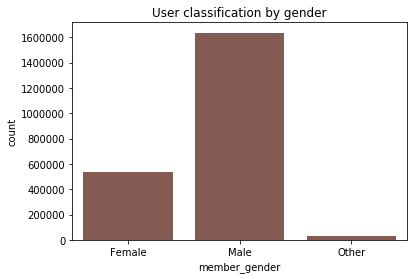

In [7]:
color=sb.color_palette()[5]
sb.countplot(data=df,x='member_gender',color=color)
plt.title('User classification by gender');

from chart above we can see that Ford GoBike user is mostly male.

## User Type Count

Text(0.5,1,'User classification by user_type')

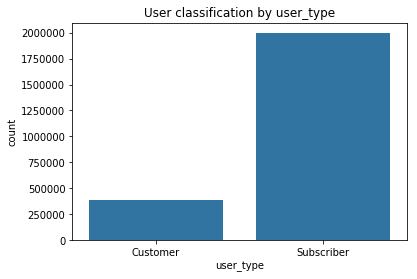

In [8]:
base_color=sb.color_palette()[0]
sb.countplot(data=df,x='user_type',color=base_color);
plt.title('User classification by user_type')

From chart above most user already subscribe

## Member Age Distribution

Text(20.7454,0.5,'Count')

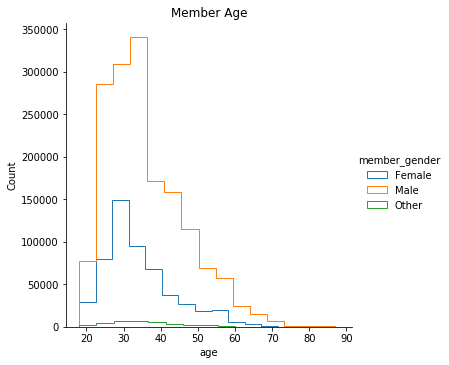

In [9]:
g = sb.FacetGrid(data = df, hue = 'member_gender', height = 5)
g.map(plt.hist, "age", bins = 15, histtype = 'step')
g.add_legend()
plt.title('Member Age')
plt.ylabel('Count')

in general Ford GoBike users are mid 20's to early 40's. Female users is slightly younger than male users. its because the dominan frequency for female users is more left than male users age

## Top 10 Start Station

Text(0.5,1,'Start Station Count')

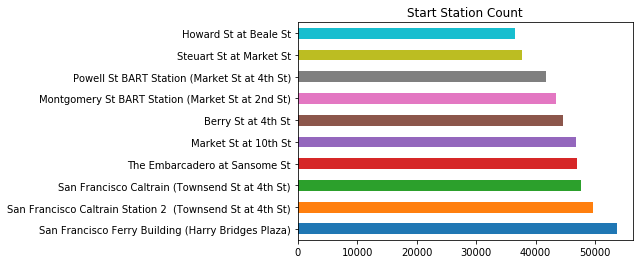

In [10]:
temp  = df.start_station_name.value_counts()
temp2 = temp.head(10)
temp2.plot(kind='barh')
plt.title('Start Station Count')

San Francisco Ferry building and San Francisco Caltrain Station 2 is the number 1 and number 2 most active station

## Bike Share for All Trip count

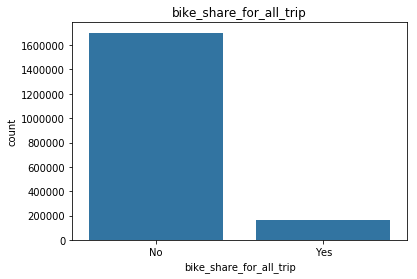

In [11]:
base_color=sb.color_palette()[0]
sb.countplot(data=df,x='bike_share_for_all_trip',color=base_color)
plt.title('bike_share_for_all_trip');

there are only a few member that use bike share for all service. We need more data such as how many people that qualify Calfresh and/or SMFTA's lifeline.

# Bivariate Exploration

## Member Gender vs Duration in Hour

(0, 0.5)

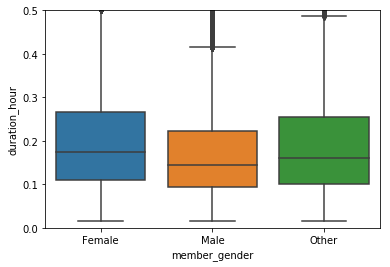

In [12]:
sb.boxplot(data=df,x='member_gender',y='duration_hour')
plt.ylim(0,0.5)

member gender didn't make significant difference rent duration. To focusing the interpretation chart above only show duration until 0.5 hour 

## Active User per Month

Text(0,0.5,'Count')

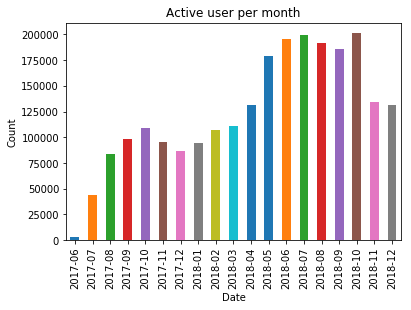

In [13]:
df.groupby(df["start_time"].dt.to_period('M'))['bike_id'].count().plot(kind='bar');
plt.title('Active user per month')
plt.xlabel('Date')
plt.ylabel('Count')

There are significant increase user from march 2018 to june 2018. but significant drop in november 2018. Season may be the caused in this increase and drop

## Age Average per Month

(25, 45)

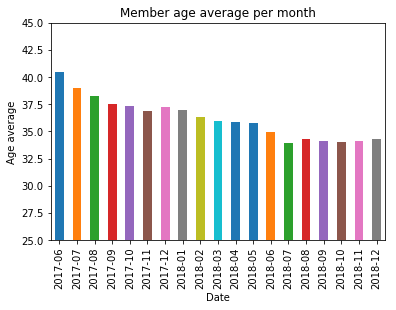

In [14]:
df.groupby(df["start_time"].dt.to_period('M'))['age'].mean().plot(kind='bar');
plt.title('Member age average per month')
plt.xlabel('Date')
plt.ylabel('Age average')
plt.ylim(25,45)

Y axis is limited from 25 to 45 so we can see the difference clearly. the average member age is getting younger through the year.

## Duration (hour) Average per Month

Text(0,0.5,'Duration average')

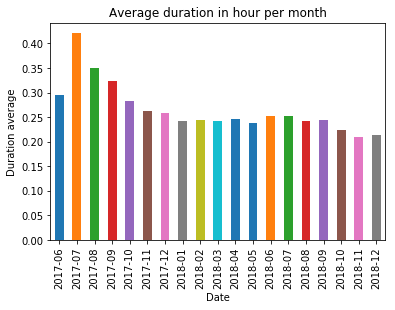

In [15]:
df.groupby(df["start_time"].dt.to_period('M'))['duration_hour'].mean().plot(kind='bar');
plt.title('Average duration in hour per month')
plt.xlabel('Date')
plt.ylabel('Duration average')

we can see that duration average is steady in general. high peak in july 2017 probably because different price or rules applied on that time.

# Multivariate Exploration

## User Type Based on Gender

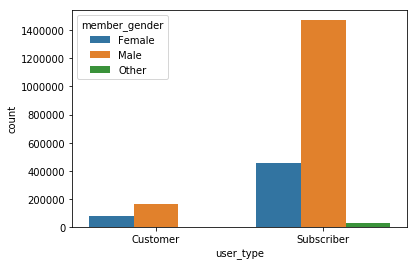

In [16]:
sb.countplot(data=df,x='user_type',hue='member_gender')

chart above give us user type distribution based on gender. the difference between male and female in subscriber member is big. I think they need to make some promotion to encourage female to subscribe to Ford GoBike.